In [14]:
# Import all necessary libraries
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import random
import timeit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.

SyntaxError: invalid syntax (<ipython-input-14-856281fa78f5>, line 20)

In [15]:
df = pd.read_csv('./reg_poli.csv', header=None)
x = df[0].to_numpy()
y = df[1].to_numpy()

M=len(x)


x = x.reshape(len(x),1)
y = y.reshape(len(y),1)
# Create test set.
# Polinomial degrees to be tested.
include_bias = False
degrees = np.arange(1,13)

fig = plt.figure(figsize=(5,5))
plt.plot(x, y, 'b.')

NameError: name 'pd' is not defined

In [16]:
# Reshape arrays so that they become column vectors.
x = x.reshape(M, 1)
y = y.reshape(M, 1)

NameError: name 'x' is not defined

In [17]:
#Holdout

# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Split the whole set into random training and validation set.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=10)

print('tamanho conjunto de treinamento:', len(y_train))
print('tamanho conjunto de validação:', len(y_val))

mean_vec = []
std_vec = []
error= []
best_degree = 0
min_error = float("inf")
for d in range(1, 13):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    polynomial_regression.fit(x_train, y_train)
    
    y_val_predict = polynomial_regression.predict(x_val)
    
    mean_vec.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))
    
    error = (np.sqrt(mean_squared_error(y_val, y_val_predict)))
    
    if(error<min_error):
        min_error = error
        best_degree = d


print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))



NameError: name 'timeit' is not defined

In [18]:
# Plot results.
plt.figure(figsize=(8, 5))
plt.plot(range(1, 13), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()
# Save figure
plt.savefig("holdout.png", dpi=600)
#Show the plot.
plt.show()

<IPython.core.display.Javascript object>

NameError: name 'mean_vec' is not defined

In [ ]:
#K-fold

# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Instantiate the k-Fold object.
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

mean_vec = []
std_vec = []
for d in range(1, 13):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=kfold)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())
    
    error=scores.mean()
    
    if(error<min_error):
        min_error = error
        best_degree = d
 
                                                    
                                                       


print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))


In [19]:
# Plot results.
plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 13), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()


# Save figure
plt.savefig("kfold.png", dpi=600)
#Show the plot.
plt.show()

<IPython.core.display.Javascript object>

NameError: name 'mean_vec' is not defined

In [32]:
# Instantiate the LOOCV object.
loocv = LeaveOneOut()

mean_vec = []
std_vec = []
for d in range(1, 13):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=loocv)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())
    
    error=scores.mean()
    
    if(error<min_error):
        min_error = error
        best_degree = d
             

    
print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))


Tempo de execução: 15.7253 [s]


In [33]:
print(best_degree)
print(min_error)

5
0.07451921011564921


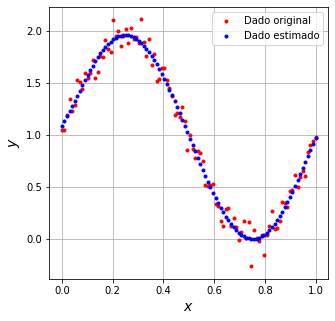

In [34]:
# Instantiate a polynomial.
poly_features = PolynomialFeatures(degree=best_degree, include_bias=True)
# Instantiate a scaler.
std_scaler = StandardScaler()
# Instantiate a linear regressor.
lin_reg = LinearRegression()
    
# Create a pipeline of actions.
polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

polynomial_regression.fit(x,y)
Y = polynomial_regression.predict(x)

fig = plt.figure(figsize=(5,5))
plt.plot(x, y, 'r.', label='Dado original')
plt.plot(x, Y, 'b.', label='Dado estimado')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
plt.show()
